<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Tensorflow_Zero2Hero/blob/main/Chapter_01_mnist_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-  Use `tf.keras` instead of Keras for better integration with
other TensorFlow APIs, such as eager execution, `tf.data`, and many more benefits

#### There are three ways of creating a model in tf.keras: `Sequential API`, `Functional API`, and `Model subclassing`.

In [1]:
import tensorflow as tf
from tensorflow import keras

- A Sequential() model is a linear pipeline (a stack) of neural network layers.

> ### Each neuron can be initialized with specific weights via the `kernel_initializer` parameter.
> > There are a few choices, the most common of which are listed as follows:
> > - random_uniform: Weights are initialized to uniformly random small values in the range -0.05 to 0.05.
> > - random_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05. For those of you who are not familiar with Gaussian distribution, think about a symmetric "bell curve" shape.
> > - zero: All weights are initialized to zero.

In [ ]:
NB_CLASSES = 10
RESHAPED = 784
# This code fragment defines a single layer with 10 artificial neurons that expects 784 input
# variables (also known as features).
# Note that the net is "dense," meaning that each
# neuron in a layer is connected to all neurons located in the previous layer, and to all the neurons in the following layer
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
 input_shape=(RESHAPED,), kernel_initializer='zeros',
 name='dense_layer', activation='softmax'))

- ReLU (REctified Linear Unit)  became very popular because it helps address some optimization problems observed
with sigmoids. We will discuss these problems in more detail when we talk about vanishing gradient, Autoencoders. A ReLU is simply defined as f(x) =
max(0, x)

-  machine learning models are a way to compute a function that maps
some inputs to their corresponding outputs.

In [2]:
# Network and training parameters.
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
DROPOUT = 0.3
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

In [3]:
# Loading MNIST dataset.
# verify
# You can verify that the split between train and test is 60,000, and 10,000 respectively.
# Labels have one-hot representation.is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# X_train is 60000 rows of 28x28 values; we --> reshape it to
# 60000 x 784.
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# each pixel are normalized in the range [0,1]  (which means that the intensity of each pixel is divided by 255, the maximum intensity value).
# Normalize inputs to be within in [0, 1].
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

#### a softmax "squashes" a K-dimensional vector of arbitrary real values into a K-dimensional vector of real values in the range (0, 1), so that they all add up to 1.

> #### Randomly dropping values, known as dropout, is a simple yet effective technique in machine learning to improve performance by forcing networks to learn redundant patterns for better generalization.

In [7]:
# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPED,),name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,name='dense_layer_3', activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## There are a few choices to be made during compilation.
> 1. Firstly, we need to select an optimizer, which is the specific algorithm used to update weights while we train our model.
> 2. Second, we need to select an objective function, which is used by the optimizer to navigate the space of weights (frequently, objective functions are called either loss functions or cost functions and the process of optimization is defined as a process of loss minimization).
> 3. Third, we need to evaluate the trained model

In [8]:
# Summary of the model.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_2 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer_3 (Dense)                │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

> #### `Mean Squared Error (MSE)` measures the squared difference between predictions and true values. It averages errors in each prediction by squaring the difference. This accounts for distance from true value and treats errors equally.
> #### `binary_crossentropy`, which defines the binary logarithmic loss. Suppose that our model predicts p while the target is c, then the binary cross-entropy is defined as 𝐿(𝑝, 𝑐) = −𝑐 ln(𝑝) − (1 − 𝑐) ln(1 − 𝑝). Note that this objective function is suitable for binary label prediction
> #### `categorical_crossentropy`, which defines the multiclass logarithmic loss. Categorical cross-entropy compares the distribution of the predictions with the true distribution, with the probability of the true class set to 1 and 0 for the other classes.

## Some common choices for metrics are:
> - `Accuracy`, which defines the proportion of correct predictions with respect to the targets
> - `Precision`, which defines how many selected items are relevant for a multilabel classification
> - `Recall`, which defines how many selected items are relevant for a multi-label
classification

In [9]:
# Compiling the model.
model.compile(optimizer='SGD',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [10]:
# Training the model.
model.fit(X_train, Y_train,
 batch_size=BATCH_SIZE, epochs=EPOCHS,
 verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3130 - loss: 2.0137 - val_accuracy: 0.8071 - val_loss: 0.9136
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6786 - loss: 1.0346 - val_accuracy: 0.8631 - val_loss: 0.5540
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7667 - loss: 0.7504 - val_accuracy: 0.8864 - val_loss: 0.4391
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8096 - loss: 0.6269 - val_accuracy: 0.8967 - val_loss: 0.3808
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8297 - loss: 0.5601 - val_accuracy: 0.9047 - val_loss: 0.3455
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8473 - loss: 0.5133 - val_accuracy: 0.9098 - val_loss: 0.3211
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8577 - loss: 0.4784 - val_accuracy: 0.9138 - val_loss: 0.3023
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8683 - loss: 0.4453 - val_accu

>### Note that improvement stops (or they become almost imperceptible) after a certain number of epochs. In machine learning, this is a phenomenon called `convergence`.
>### note that training accuracy should still be above test accuracy, otherwise, we might be not training for long enough.

In [11]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0919
Test accuracy: 0.9772999882698059


In [13]:
X_test[0].shape

(784,)

In [16]:
model.predict(X_test[0].reshape(1, -1)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


7

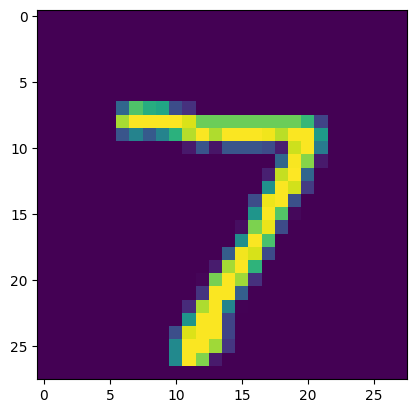

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28, 28))